In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('clean_df.csv', low_memory = False)

In [32]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
1,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
2,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,01-01-1982
3,20020909X01558,Accident,ATL82DKJ10,1982-01-01,"TUSKEGEE, AL",United States,NaN,NaN,NaN,TUSKEGEE,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,01-01-1982
4,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983


In [33]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [34]:
piper_data = df[df['Make'] == 'piper']

In [35]:
print(piper_data[piper_data['Injury.Severity']== 'Fatal'])

             Event.Id Investigation.Type Accident.Number Event.Date  \
20     20020917X02618           Accident      SEA82FA015 1982-01-04   
21     20020917X02254           Accident      LAX82FA038 1982-01-04   
26     20020917X02253           Accident      LAX82FA036 1982-01-05   
27     20020917X01906           Accident      DCA82AA009 1982-01-05   
40     20020917X01881           Accident      CHI82FA024 1982-01-08   
...               ...                ...             ...        ...   
55781  20221109106270           Accident      CEN23FA031 2022-11-09   
55785  20221114106278           Accident      ANC23FA004 2022-11-10   
55802  20221119106324           Accident      ERA23FA067 2022-11-19   
55807  20221122106339           Accident      GAA23WA029 2022-11-21   
55823  20221205106409           Accident      ERA23FA079 2022-12-03   

                  Location        Country Latitude Longitude Airport.Code  \
20       PLEASANT HILL, OR  United States      NaN       NaN          

In [36]:
piper_data = df[(df['Make'] == 'piper') & (df['Injury.Severity'].isin(['Minor', 'Serious']))]


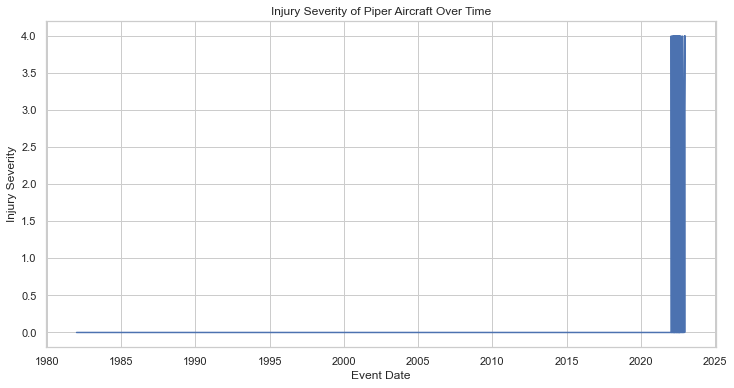

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('clean_df.csv', low_memory=False)

df['Event.Date'] = pd.to_datetime(df['Event.Date'])

severity_mapping = {'Non-Fatal': 0, 'Incident': 1, 'Fatal': 2, 'Serious': 3, 'Minor': 4}
df['Injury.Severity'] = df['Injury.Severity'].map(severity_mapping)

piper_data = df[(df['Make'] == 'piper') & (df['Injury.Severity'].isin([0, 3, 4]))]

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x='Event.Date', y='Injury.Severity', data=piper_data, ci=None)

plt.title('Injury Severity of Piper Aircraft Over Time')
plt.xlabel('Event Date')
plt.ylabel('Injury Severity')
plt.show()


No handles with labels found to put in legend.


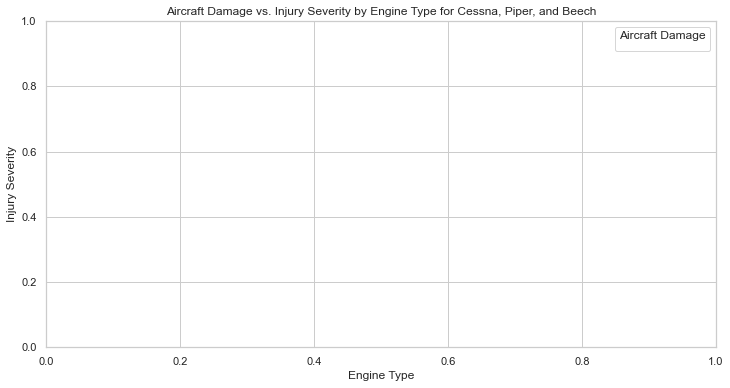

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('clean_df.csv', low_memory = False)

selected_models = ['Cessna', 'Piper', 'Beech']
filtered_data = df[df['Make'].isin(selected_models)]

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Engine.Type', y='Injury.Severity', hue='Aircraft.damage', data=filtered_data, palette='Set2', s=100)

plt.title('Aircraft Damage vs. Injury Severity by Engine Type for Cessna, Piper, and Beech')
plt.xlabel('Engine Type')
plt.ylabel('Injury Severity')
plt.legend(title='Aircraft Damage')
plt.show()


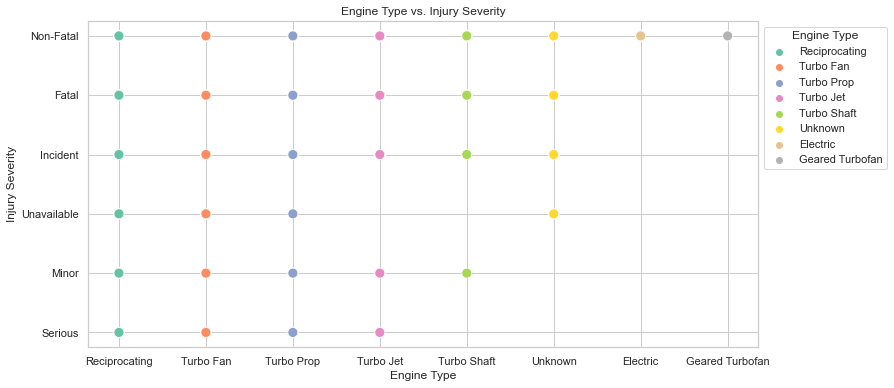

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('clean_df.csv', low_memory=False)


sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
scatter_plot = sns.scatterplot(x='Engine.Type', y='Injury.Severity', data=df, hue='Engine.Type', palette='Set2', s=100)


plt.title('Engine Type vs. Injury Severity')
plt.xlabel('Engine Type')
plt.ylabel('Injury Severity')


scatter_plot.legend(title='Engine Type', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55855 entries, 0 to 55854
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                55855 non-null  object 
 1   Investigation.Type      55855 non-null  object 
 2   Accident.Number         55855 non-null  object 
 3   Event.Date              55855 non-null  object 
 4   Location                55831 non-null  object 
 5   Country                 55747 non-null  object 
 6   Latitude                20957 non-null  object 
 7   Longitude               20952 non-null  object 
 8   Airport.Code            31982 non-null  object 
 9   Airport.Name            33886 non-null  object 
 10  Injury.Severity         55199 non-null  object 
 11  Aircraft.damage         55855 non-null  object 
 12  Aircraft.Category       55855 non-null  object 
 13  Registration.Number     55250 non-null  object 
 14  Make                    55855 non-null

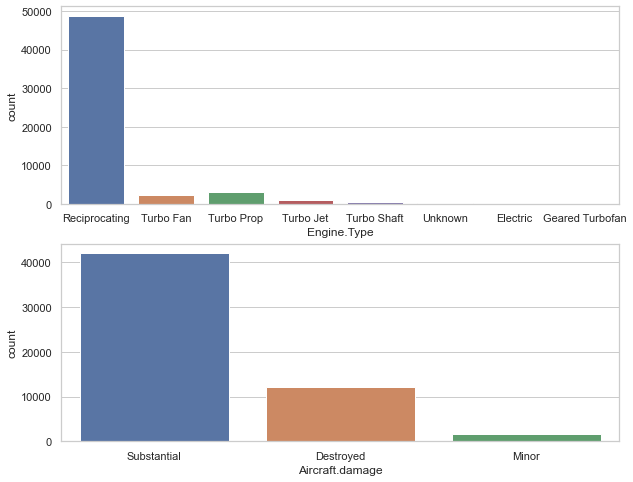

In [5]:
fig, ax = plt.subplots(2,1, figsize=(10,8))
sns.countplot(data=df, x='Engine.Type', ax=ax[0])
sns.countplot(data=df, x='Aircraft.damage', ax=ax[1])

plt.tight_layout;

In [7]:
eng_num_list = [1,2,3,4]
perc_destroyed_list2 = []

for num in eng_num_list:
    perc_destroyed = len(df[(df['Number.of.Engines']==num) & (df['Aircraft.damage']=='Destroyed')]['Number.of.Engines']) / len(df[df['Number.of.Engines']==num]['Number.of.Engines'])*100
    perc_destroyed_list2.append(perc_destroyed)   

perc_destroyed_list2

[20.788538329896003, 25.882475083056477, 5.88235294117647, 10.452961672473867]

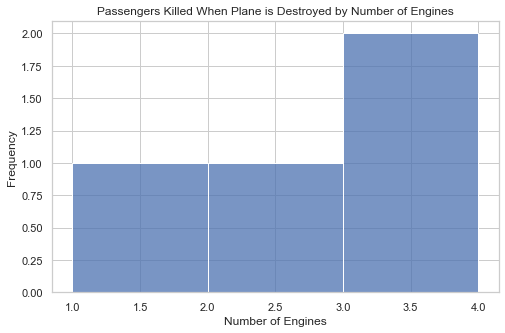

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.histplot(x=eng_num_list, bins='auto', ax=ax)
ax.set_title('Passengers Killed When Plane is Destroyed by Number of Engines')
ax.set_xlabel('Number of Engines')
ax.set_ylabel('Frequency') 

plt.show()

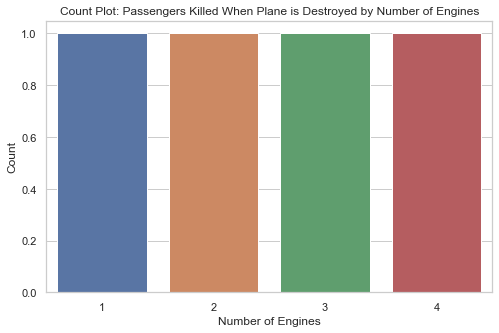

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.countplot(x=eng_num_list, ax=ax)

ax.set_title('Count Plot: Passengers Killed When Plane is Destroyed by Number of Engines')
ax.set_xlabel('Number of Engines')
ax.set_ylabel('Count')

plt.show()